In [26]:
import os
import spacy
import docx2txt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import textract

from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings('ignore')

In [27]:
# Folder names

os.listdir("D:\DS datasets\DS NLP project\Res\Resumes_Classification\Resumes_Docx")

['Peoplesoft Resume', 'React Developer', 'SQL Developer', 'workday']

## 1. Explore the Dataset and it's  Extentions

In [28]:
import os

file_path = r"D:\DS datasets\DS NLP project\Res\Resumes_Classification\Resumes_Docx"
doc_file = []
pdf_file = []
docx_file = []
folder_name = []

for folder in os.listdir(file_path):
    folder_path = os.path.join(file_path, folder)  # Use os.path.join() to concatenate paths
    for file in os.listdir(folder_path):
        file_full_path = os.path.join(folder_path, file)  # Full path of the file
        if file.endswith('.doc'):
            doc_file.append(file_full_path)
            folder_name.append(folder)
        elif file.endswith('.docx'):
            docx_file.append(file_full_path)
            folder_name.append(folder)
        else:
            pdf_file.append(file_full_path)
            folder_name.append(folder)


In [29]:
print('Number of .doc Files  = {}'.format(len(doc_file)),'\n'
      'Number of .pdf Files  = {}'.format(len(pdf_file)),'\n'
      'Number of .docx Files = {}'.format(len(docx_file)))

Number of .doc Files  = 0 
Number of .pdf Files  = 0 
Number of .docx Files = 79


In [30]:
print("Total Number of Files = ", len(docx_file)+len(doc_file)+len(pdf_file))

Total Number of Files =  79


## 2. Count plots of the file extentions

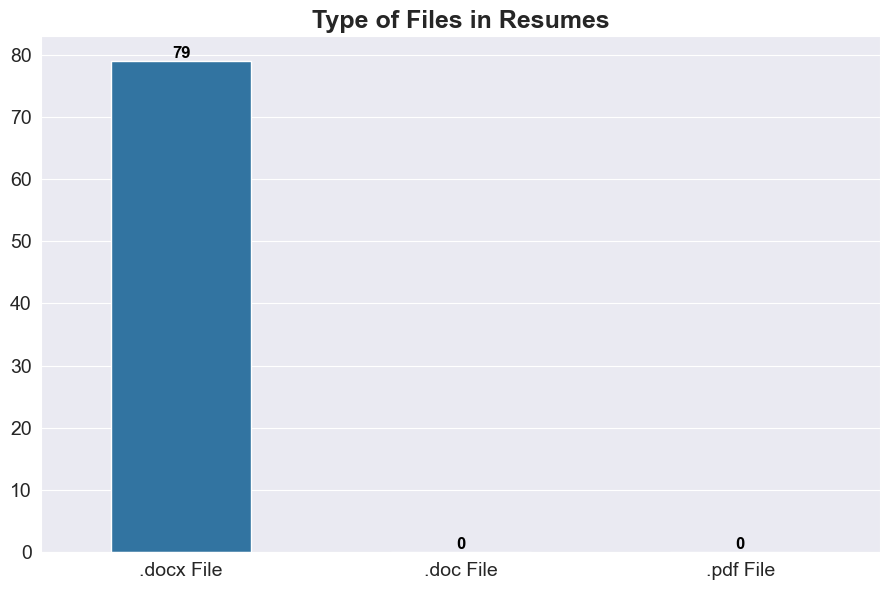

In [31]:
rcParams = {'xtick.labelsize':'14','ytick.labelsize':'14','axes.labelsize':'16'}

fig, axe = plt.subplots(1,1, figsize=(9,6), dpi=100)
ax = sns.barplot(x=['.docx File','.doc File','.pdf File'], y= [len(docx_file),len(doc_file),len(pdf_file)], width=0.5,
                 ax = axe, label= 'Total Resumes = {}'.format(len(docx_file)+len(doc_file)+len(pdf_file)))


plt.title('Type of Files in Resumes', fontsize= 18, fontweight= 'bold')

for i in ax.containers:
    ax.bar_label(i,color = 'black', fontweight = 'bold', fontsize= 12)
    
pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()


# 2. Collecting the unprocessed file names with different extentions and associating each with their respective Profiles.

In [32]:
file_path = r"D:\DS datasets\DS NLP project\Res\Resumes_Classification\Resumes_Docx"
file_name = []
profile   = []


for folder in os.listdir(file_path):
    folder_path = os.path.join(file_path, folder)
    for file in os.listdir(folder_path):
        if file.endswith('.doc') or file.endswith('.docx') or file.endswith('.pdf'):
            profile.append(folder)
            file_name.append(file)


In [33]:
resume_data = pd.DataFrame()
resume_data['Profile'] = profile
resume_data['Resumes'] = file_name
resume_data

,Profile,Resumes
0,Peoplesoft Resume,Peoplesoft Admin_AnubhavSingh.docx
1,Peoplesoft Resume,Peoplesoft Admin_G Ananda Rayudu.docx
2,Peoplesoft Resume,Peoplesoft Admin_Gangareddy.docx
3,Peoplesoft Resume,Peoplesoft Admin_Murali.docx
4,Peoplesoft Resume,Peoplesoft Admin_Priyanka Ramadoss.docx
...,...,...
74,workday,Sri Krishna S_Hexaware.docx
75,workday,Srikanth-Hexaware.docx
76,workday,SSKumar_Hexaware.docx
77,workday,Venkateswarlu B_Hexaware.docx


In [34]:
resume_data.Profile.value_counts().index

Index(['React Developer', 'workday', 'Peoplesoft Resume', 'SQL Developer'], dtype='object')

## Total number of Profiles

In [35]:
resume_data.Profile.value_counts()

React Developer      24
workday              21
Peoplesoft Resume    20
SQL Developer        14
Name: Profile, dtype: int64

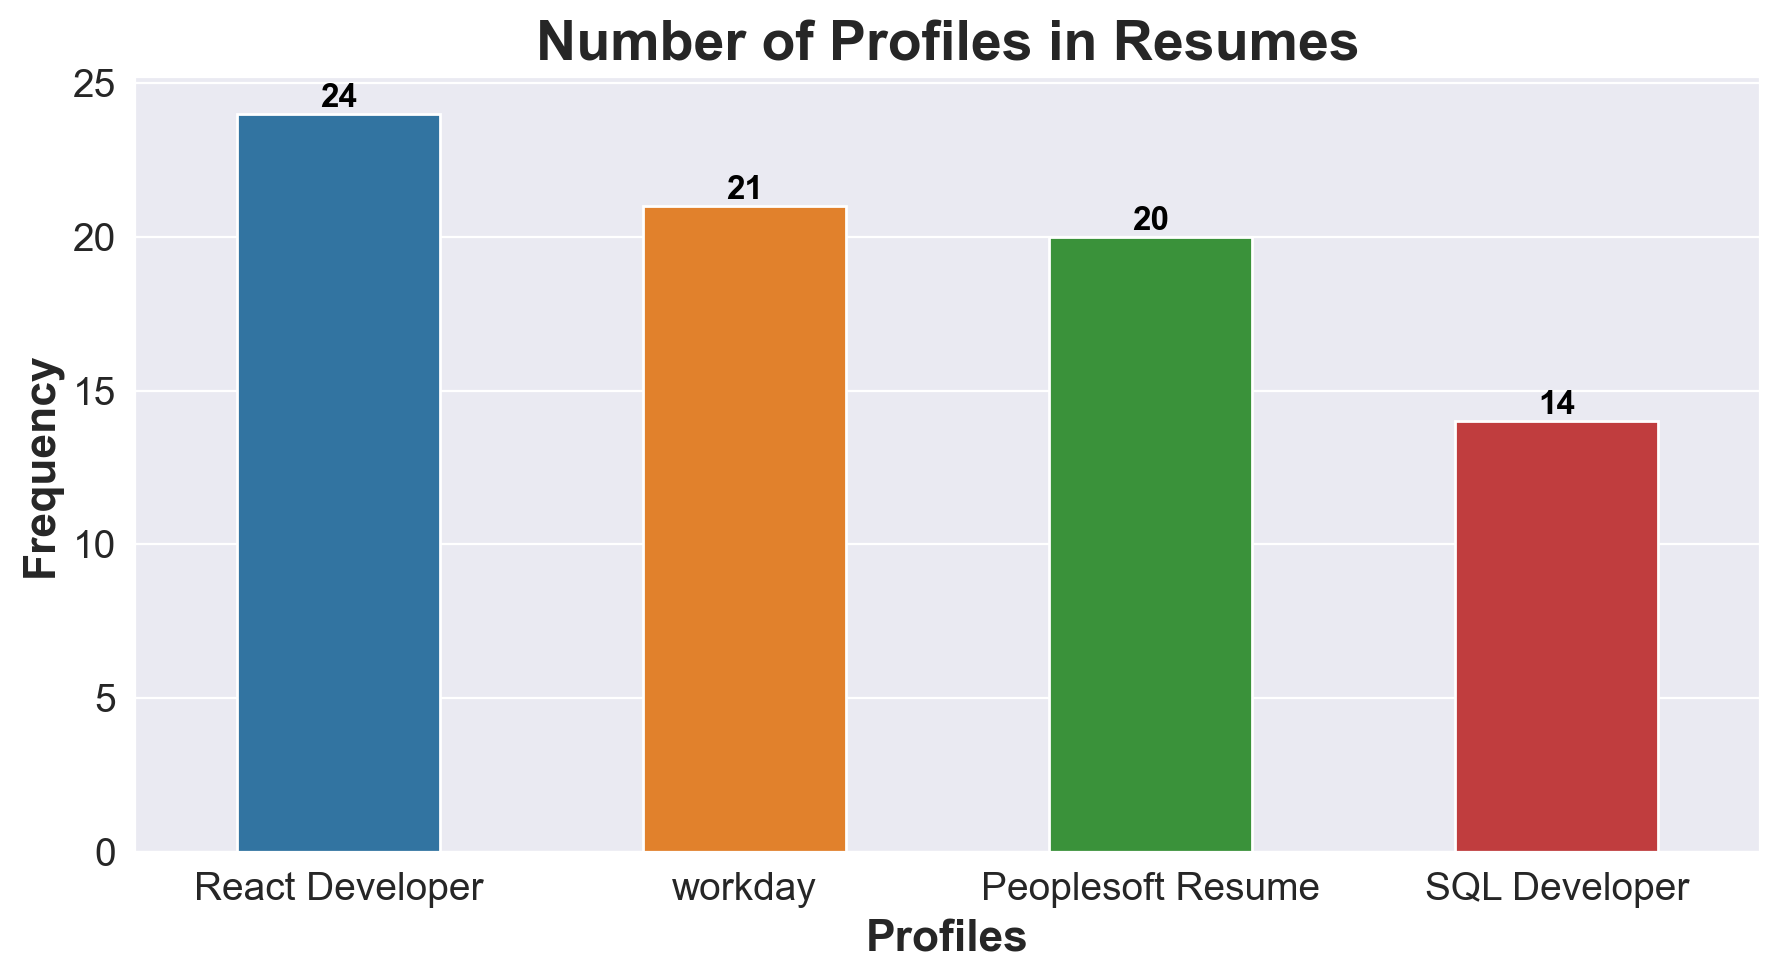

In [36]:
fig, axe = plt.subplots(1,1, figsize=(9,5), dpi=200)
ax = sns.barplot(x= resume_data.Profile.value_counts().index, y= resume_data.Profile.value_counts(), width=0.5,
                 data= resume_data, ax= axe, label= 'Total Pofile Category : {}'.format(len(resume_data.Profile.unique())))

axe.set_xlabel('Profiles', size=16,fontweight = 'bold')
axe.set_ylabel('Frequency', size=16,fontweight = 'bold')
plt.xticks(rotation = 0)

plt.title('Number of Profiles in Resumes', fontsize= 20, fontweight= 'bold')

for i in ax.containers:
    ax.bar_label(i,color = 'black', fontweight = 'bold', fontsize= 12)
    
pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

## 3. Extracting the text data out of the unprocessed files and putting them into new dataframes for processing.

In [37]:
## Extracting all the  text data out of each profiles i.e. React dev,SQL dev, Workday, Peoplesoft

import os
import textract

file_path1 = []
category1 = []
directory1 = r"D:\DS datasets\DS NLP project\Res\Resumes_Classification\Resumes_Docx\React Developer"

for i in os.listdir(directory1):
    if i.endswith('.docx') or i.endswith('.pdf'):
        full_path = os.path.join(directory1, i)
        text = textract.process(full_path).decode('utf-8')
        file_path1.append(text)
        category1.append('React JS Developer Resume')

print(file_path1)
print(category1)


['Name: Ravali P \n\n\n\n                                                                             Curriculum Vitae \n\n                                          Specialization: BE (computer science and Engg)   \n\n\n\n       \n\nC\n\nA\n\nR\n\nEE\n\nR\n\n \n\nOB\n\nJE\n\nCT\n\nI\n\nV\n\nE\n\n \n\n       \n\nC\n\nA\n\nR\n\nEE\n\nR\n\n \n\nOB\n\nJE\n\nCT\n\nI\n\nV\n\nE\n\n \n\n \n\nTo utilize my technical skills for achieving the target and developing the best performance in organization. \n\n \n\n \n\n\n\n        \n\nE\n\nD\n\nU\n\nC\n\nA\n\nT\n\nION\n\n \n\n        \n\nE\n\nD\n\nU\n\nC\n\nA\n\nT\n\nION\n\n \n\n \n\n \n\nDegree/Course \n\n \n\nCollege/Institute \n\nUniversity/ Board \n\nPercentage/ CGPA \n\n \n\nYear of Passing \n\n \n\n \n\n \n\n \n\n \n\n CGPACGPA \n\n \n\n \n\n \n\n \n\n             \n\n            BE \n\n \n\n S J B Institute of technology \n\n \n\n \n\nVTU \n\n \n\n6.5 CGPA \n\n \n\n \n\n2021 \n\n \n\n        \n\n         Diploma \n\nAryabharathi polytechnic \n

In [38]:
file_path1,category1

(['Name: Ravali P \n\n\n\n                                                                             Curriculum Vitae \n\n                                          Specialization: BE (computer science and Engg)   \n\n\n\n       \n\nC\n\nA\n\nR\n\nEE\n\nR\n\n \n\nOB\n\nJE\n\nCT\n\nI\n\nV\n\nE\n\n \n\n       \n\nC\n\nA\n\nR\n\nEE\n\nR\n\n \n\nOB\n\nJE\n\nCT\n\nI\n\nV\n\nE\n\n \n\n \n\nTo utilize my technical skills for achieving the target and developing the best performance in organization. \n\n \n\n \n\n\n\n        \n\nE\n\nD\n\nU\n\nC\n\nA\n\nT\n\nION\n\n \n\n        \n\nE\n\nD\n\nU\n\nC\n\nA\n\nT\n\nION\n\n \n\n \n\n \n\nDegree/Course \n\n \n\nCollege/Institute \n\nUniversity/ Board \n\nPercentage/ CGPA \n\n \n\nYear of Passing \n\n \n\n \n\n \n\n \n\n \n\n CGPACGPA \n\n \n\n \n\n \n\n \n\n             \n\n            BE \n\n \n\n S J B Institute of technology \n\n \n\n \n\nVTU \n\n \n\n6.5 CGPA \n\n \n\n \n\n2021 \n\n \n\n        \n\n         Diploma \n\nAryabharathi polytechnic \

In [39]:
data1 = pd.DataFrame(data = file_path1 , columns = ['Details'])
data1['Category1'] = category1
data1

,Details,Category1
0,Name: Ravali P \n\n\n\n ...,React JS Developer Resume
1,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer Resume
2,Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...,React JS Developer Resume
3,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React JS Developer Resume
4,KAMALAKAR REDDY. A \n\nLinked In: https://www....,React JS Developer Resume
5,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS Developer Resume
6,FULLSTACK SOFTWARE DEVELOPER / WEB DEVELOPER\n...,React JS Developer Resume
7,PRAGNYA PATTNAIK\n\n \n\n \n\n \n\n Expertise:...,React JS Developer Resume
8,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...",React JS Developer Resume
9,Thirupathamma Balla\n\n\n\nSUMMARY:\n\n\n\n2.8...,React JS Developer Resume


In [40]:
file_path2 = []
category2 = []
directory2 = r"D:\DS datasets\DS NLP project\Res\Resumes_Classification\Resumes_Docx\Peoplesoft Resume"

for i in os.listdir(directory2):
    if i.endswith('.docx') or i.endswith('.pdf'):
        full_path = os.path.join(directory2, i)
        text = textract.process(full_path).decode('utf-8')
        file_path2.append(text)
        category2.append('Peoplesoft')

print(file_path2)
print(category2)

['Anubhav Kumar Singh\t\t\n\n\n\nCore Competencies:\n\n\n\nScripting\t\t: Shell Scripting\n\n\n\nApplication\t\t: PeopleSoft HCM, FINANCIALS\n\n\n\nOperating System\t: Linux ,Windows\n\n\n\nWeb/App Servers\t: Weblogic, Tuxedo\n\n\n\nRDBMS\t\t: Oracle\n\n\n\nRepository \t\t: Github\n\n\n\nCore Competencies:\n\n\n\nScripting\t\t: Shell Scripting\n\n\n\nApplication\t\t: PeopleSoft HCM, FINANCIALS\n\n\n\nOperating System\t: Linux ,Windows\n\n\n\nWeb/App Servers\t: Weblogic, Tuxedo\n\n\n\nRDBMS\t\t: Oracle\n\n\n\nRepository \t\t: Github\n\n\n\n  To work in a globally competitive environment on \n\n  challenging assignments that shall yield the \n\n  twin benefits of the job satisfaction and a steady-paced \n\n  professional growth.\n\n\n\n\n\n\n\n\n\n\n\n\n\n \n\n\n\n\n\n \n\n\n\n\n\n Professional Experience\n\n\n\n 06/2019 - Current\tHCL\t\t\t\t\t\t\t\t\t\t\n\n\t\t\tCurrent Role: System Admin Offshore\n\n\t\t\tSkills : Shell Scripting, Linux , PeopleSoft Administration , Github\n\n\n\nMana

In [41]:
data2 = pd.DataFrame(data = file_path2 , columns = ['Details'])
data2['Category2'] = category2
data2

,Details,Category2
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,Peoplesoft
1,G. Ananda Rayudu \n\n\t\t https://www.li...,Peoplesoft
2,PeopleSoft Database Administrator\n\n ...,Peoplesoft
3,Classification: Internal\n\nClassification: In...,Peoplesoft
4,"Priyanka Ramadoss\n\n\t61/46, MountPleasant, \...",Peoplesoft
5,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",Peoplesoft
6,PEOPLESOFT Administrator\n\n\n\n\n\nSRINIVAS.K...,Peoplesoft
7,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,Peoplesoft
8,Vinod Akkala ...,Peoplesoft
9,Vinod Akkala ...,Peoplesoft


In [42]:
file_path3 = []
category3 = []
directory3 = r"D:\DS datasets\DS NLP project\Res\Resumes_Classification\Resumes_Docx\SQL Developer"

for i in os.listdir(directory3):
    if i.endswith('.docx') or i.endswith('.pdf'):
        full_path = os.path.join(directory3, i)
        text = textract.process(full_path).decode('utf-8')
        file_path3.append(text)
        category3.append('SQL Developer')

print(file_path3)
print(category3)

['ANIL KUMAR MADDUKURI  \t\t\n\nSQL & MSBI Developer   \n\n\n\n\t\t\n\n\n\nSummary\n\n\n\n2.4 years of experience in MS SQL Server (SSMS) and creating SSIS packages, SSRS Reports by using Microsoft Business Intelligence (MSBI) tools.\n\nExpertise in various types of Joins and Sub Queries for writing complex queries involving multiple tables.\n\nHandled data manipulation and data consistency by creating Views, Triggers, and Synonyms.\n\nHands on experience in creation, optimization and debugging Stored Procedure and Functions.\n\nFamiliar in writing queries using CTE, Temporary Tables and Table Variables.\n\nGood experience in using Set Operators like Union, Union All, Except and Intersect to assist required data.\n\nExperience in manipulate the data from multiple table and report to the client using Aggregate Functions, Windows Functions and String Functions.\n\nWorked extensively on Data Extraction, Transformation and Loading (ETL) process in SQL Server Integration Services.\n\nUsed c

In [43]:
data3 = pd.DataFrame(data = file_path3 , columns = ['Details'])
data3['Category3'] = category3
data3

,Details,Category3
0,ANIL KUMAR MADDUKURI \t\t\n\nSQL & MSBI Devel...,SQL Developer
1,Aradhana Tripathi\n\n\n\nCurrent Location: Gac...,SQL Developer
2,BUDDHA VAMSI ...,SQL Developer
3,KAMBALLA PRADEEP ...,SQL Developer
4, Hyderabad\n\n\nNazeer Basha\n\nSQL and Power...,SQL Developer
5,Resume\n\nName : Neeraj Mishra\n\n\n\nExp...,SQL Developer
6,SQL DEVELOPER\n\nName: - Bandi prem sai\n\n\...,SQL Developer
7,SQL SERVER DEVELOPER\n\n\n\n\n\nPriyanka L ...,SQL Developer
8,SQL SERVER DEVELOPER\n\n\n\n\n\nP. Syam Kumar ...,SQL Developer
9,RAJU PAVANA KUMARI\n\n\n\n\t\n\n\tProfessional...,SQL Developer


In [44]:
file_path4 = []
category4 = []
directory4 = r"D:\DS datasets\DS NLP project\Res\Resumes_Classification\Resumes_Docx\workday"

for i in os.listdir(directory4):
    if i.endswith('.docx') or i.endswith('.pdf'):
        full_path = os.path.join(directory4, i)
        text = textract.process(full_path).decode('utf-8')
        file_path4.append(text)
        category4.append('Workday')

print(file_path4)
print(category4)

['Chinna Subbarayudu M\n\nDOB: 06th March 1994\n\nNationality: Indian\n\n\t\t\n\n\t\t\tPROFILE SUMMARY:\n\n\n\n\n\n\n\nHaving around 5.1 years of IT experience in developing and Implementation of ERP technology by using Workday HCM and ETL (informatica) technologies.\n\n3.6 years of experience as Workday Integration Consultant and involved in a maintenance and implementation.\n\nExperience in all phases in Workday like requirements gathering, Analysis, Design, Development and Testing.\n\nHands on experience in inbound/ outbound integrations using core connector, Workday studio, managing business processes, working with EIB, report writer.\n\nDeveloped and maintained custom-report types (Advanced, Matrix, Composite) using report writer tool.\n\nInvolved in transformation of XML into XSLT for presenting data for different web Services.\n\nBuilding Workday Integration (EIB), calculated fields, Custom Reports and Writing XSLT transformation code.\n\nDeveloped testing\xa0strategies and vali

In [45]:
data4 = pd.DataFrame(data = file_path4 , columns = ['Details'])
data4['Category4'] = category4
data4

,Details,Category4
0,Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...,Workday
1,Name : Gopi Krishna Reddy\n\n\t\t\t\t ...,Workday
2,Hari Krishna M\n\n\n\n\n\nSummary:\n\nA result...,Workday
3,Harikrishna Akula ...,Workday
4,HIMA.MENDU\n\n\t \n\n\n\nCareer Objective\n\n...,Workday
5,G Himaja\n\n ...,Workday
6,Name:\tJ. Sumanth Royal.\n\n\t\n\nPROFESSIONAL...,Workday
7,JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...,Workday
8,Madeeswar A\n\n\t\n\n\t\t\n\n\t\t\tPROFILE SUM...,Workday
9,Mooraboyina Guravaiah\n\nWorkday Integration S...,Workday


### Merge all the dataframes.

In [46]:
df = data1.append([data2, data3, data4], ignore_index = True)
df

,Details,Category1,Category2,Category3,Category4
0,Name: Ravali P \n\n\n\n ...,React JS Developer Resume,NaN,NaN,NaN
1,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer Resume,NaN,NaN,NaN
2,Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...,React JS Developer Resume,NaN,NaN,NaN
3,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React JS Developer Resume,NaN,NaN,NaN
4,KAMALAKAR REDDY. A \n\nLinked In: https://www....,React JS Developer Resume,NaN,NaN,NaN
...,...,...,...,...,...
74,Workday Integration Consultant\n\n\n\nName ...,NaN,NaN,NaN,Workday
75,Srikanth (WORKDAY hCM Consultant)\t ...,NaN,NaN,NaN,Workday
76,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...,NaN,NaN,NaN,Workday
77,Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...,NaN,NaN,NaN,Workday


In [47]:
df['Category'] = category1 + category2 + category3 + category4
df

,Details,Category1,Category2,Category3,Category4,Category
0,Name: Ravali P \n\n\n\n ...,React JS Developer Resume,NaN,NaN,NaN,React JS Developer Resume
1,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer Resume,NaN,NaN,NaN,React JS Developer Resume
2,Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...,React JS Developer Resume,NaN,NaN,NaN,React JS Developer Resume
3,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React JS Developer Resume,NaN,NaN,NaN,React JS Developer Resume
4,KAMALAKAR REDDY. A \n\nLinked In: https://www....,React JS Developer Resume,NaN,NaN,NaN,React JS Developer Resume
...,...,...,...,...,...,...
74,Workday Integration Consultant\n\n\n\nName ...,NaN,NaN,NaN,Workday,Workday
75,Srikanth (WORKDAY hCM Consultant)\t ...,NaN,NaN,NaN,Workday,Workday
76,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...,NaN,NaN,NaN,Workday,Workday
77,Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...,NaN,NaN,NaN,Workday,Workday


## 4. Take alll the categories and put them into one column named as Category.

In [48]:
# Dropping the unnecessary columns i.e. category1, category2, category3,category4

df.drop(['Category1', 'Category2', 'Category3', 'Category4'], axis = 1, inplace = True)
df

,Details,Category
0,Name: Ravali P \n\n\n\n ...,React JS Developer Resume
1,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer Resume
2,Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...,React JS Developer Resume
3,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React JS Developer Resume
4,KAMALAKAR REDDY. A \n\nLinked In: https://www....,React JS Developer Resume
...,...,...
74,Workday Integration Consultant\n\n\n\nName ...,Workday
75,Srikanth (WORKDAY hCM Consultant)\t ...,Workday
76,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...,Workday
77,Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...,Workday


#### - Convert the cleaned dataframe into a .csv file.

In [49]:
df.to_csv('Resume_nlp.csv', index=False)

In [50]:
Resume_df = pd.read_csv('Resume_nlp.csv')
Resume_df

,Details,Category
0,Name: Ravali P \n\n\n\n ...,React JS Developer Resume
1,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer Resume
2,Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...,React JS Developer Resume
3,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React JS Developer Resume
4,KAMALAKAR REDDY. A \n\nLinked In: https://www....,React JS Developer Resume
...,...,...
74,Workday Integration Consultant\n\n\n\nName ...,Workday
75,Srikanth (WORKDAY hCM Consultant)\t ...,Workday
76,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...,Workday
77,Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...,Workday


## Resume_df is our final dataset on which we can perform all the NLP tools.

### Checking for some usless words that can be there in the text data like - https:// and @ etc.

In [51]:
Resume_df.Details.str.contains('https://').value_counts() / len(Resume_df)

False    0.911392
True     0.088608
Name: Details, dtype: float64

In [52]:
Resume_df.Details.str.contains('@').value_counts()/ len(Resume_df)

False    0.962025
True     0.037975
Name: Details, dtype: float64

# 5. Applying .strip() function to remove all the spaces , leading and trailing characters such as non-alphabetic or non-numeric characters.

In [53]:
#from nltk import word_tokenize

#the word_tokenizer will separate each and every word as a list object and each object is called as token

#tokens = Resume_df.Details.map(word_tokenize)

In [54]:
data=[Text.strip() for Text in Resume_df.Details] # remove both the leading and the trailing characters
data=[Text for Text in data if Text] # removes empty strings, because they are considered in Python as False
data[0:10]

['Name: Ravali P \n\n\n\n                                                                             Curriculum Vitae \n\n                                          Specialization: BE (computer science and Engg)   \n\n\n\n       \n\nC\n\nA\n\nR\n\nEE\n\nR\n\n \n\nOB\n\nJE\n\nCT\n\nI\n\nV\n\nE\n\n \n\n       \n\nC\n\nA\n\nR\n\nEE\n\nR\n\n \n\nOB\n\nJE\n\nCT\n\nI\n\nV\n\nE\n\n \n\n \n\nTo utilize my technical skills for achieving the target and developing the best performance in organization. \n\n \n\n \n\n\n\n        \n\nE\n\nD\n\nU\n\nC\n\nA\n\nT\n\nION\n\n \n\n        \n\nE\n\nD\n\nU\n\nC\n\nA\n\nT\n\nION\n\n \n\n \n\n \n\nDegree/Course \n\n \n\nCollege/Institute \n\nUniversity/ Board \n\nPercentage/ CGPA \n\n \n\nYear of Passing \n\n \n\n \n\n \n\n \n\n \n\n CGPACGPA \n\n \n\n \n\n \n\n \n\n             \n\n            BE \n\n \n\n S J B Institute of technology \n\n \n\n \n\nVTU \n\n \n\n6.5 CGPA \n\n \n\n \n\n2021 \n\n \n\n        \n\n         Diploma \n\nAryabharathi polytechnic \n

In [55]:
#Join the whole text data into one string

review_text=' '.join(data)
review_text[:1000]

'Name: Ravali P \n\n\n\n                                                                             Curriculum Vitae \n\n                                          Specialization: BE (computer science and Engg)   \n\n\n\n       \n\nC\n\nA\n\nR\n\nEE\n\nR\n\n \n\nOB\n\nJE\n\nCT\n\nI\n\nV\n\nE\n\n \n\n       \n\nC\n\nA\n\nR\n\nEE\n\nR\n\n \n\nOB\n\nJE\n\nCT\n\nI\n\nV\n\nE\n\n \n\n \n\nTo utilize my technical skills for achieving the target and developing the best performance in organization. \n\n \n\n \n\n\n\n        \n\nE\n\nD\n\nU\n\nC\n\nA\n\nT\n\nION\n\n \n\n        \n\nE\n\nD\n\nU\n\nC\n\nA\n\nT\n\nION\n\n \n\n \n\n \n\nDegree/Course \n\n \n\nCollege/Institute \n\nUniversity/ Board \n\nPercentage/ CGPA \n\n \n\nYear of Passing \n\n \n\n \n\n \n\n \n\n \n\n CGPACGPA \n\n \n\n \n\n \n\n \n\n             \n\n            BE \n\n \n\n S J B Institute of technology \n\n \n\n \n\nVTU \n\n \n\n6.5 CGPA \n\n \n\n \n\n2021 \n\n \n\n        \n\n         Diploma \n\nAryabharathi polytechnic \n\

# 6. Tokenization

In [56]:
# Importing tweettokenizer and applying it on the review data to tokenize the text

from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer(strip_handles=True)
review_tokens=tknzr.tokenize(review_text)
print(review_tokens[:100])

['Name', ':', 'Ravali', 'P', 'Curriculum', 'Vitae', 'Specialization', ':', 'BE', '(', 'computer', 'science', 'and', 'Engg', ')', 'C', 'A', 'R', 'EE', 'R', 'OB', 'JE', 'CT', 'I', 'V', 'E', 'C', 'A', 'R', 'EE', 'R', 'OB', 'JE', 'CT', 'I', 'V', 'E', 'To', 'utilize', 'my', 'technical', 'skills', 'for', 'achieving', 'the', 'target', 'and', 'developing', 'the', 'best', 'performance', 'in', 'organization', '.', 'E', 'D', 'U', 'C', 'A', 'T', 'ION', 'E', 'D', 'U', 'C', 'A', 'T', 'ION', 'Degree', '/', 'Course', 'College', '/', 'Institute', 'University', '/', 'Board', 'Percentage', '/', 'CGPA', 'Year', 'of', 'Passing', 'CGPACGPA', 'BE', 'S', 'J', 'B', 'Institute', 'of', 'technology', 'VTU', '6.5', 'CGPA', '2021', 'Diploma', 'Aryabharathi', 'polytechnic', 'Karnataka', 'State']


In [57]:
review_tokens_text=' '.join(review_tokens)
review_tokens_text[:1000]

'Name : Ravali P Curriculum Vitae Specialization : BE ( computer science and Engg ) C A R EE R OB JE CT I V E C A R EE R OB JE CT I V E To utilize my technical skills for achieving the target and developing the best performance in organization . E D U C A T ION E D U C A T ION Degree / Course College / Institute University / Board Percentage / CGPA Year of Passing CGPACGPA BE S J B Institute of technology VTU 6.5 CGPA 2021 Diploma Aryabharathi polytechnic Karnataka State Board of Technical Examination , Bengaluru 60 % 2017 SSLC Empress girls high school Karnataka Secondary Education Board 52.8 % 2011 MANUAL TESTING SKILLS Strong knowledge in SDLC concepts . Extensive knowledge in White Box Testing . Good knowledge in Functional testing , Integration testing , Extreme Knowledge on System Testing Good knowledge in Adhoc Testing , Reliability testing . Good Knowledge on Exploratory Testing Good knowledge in STLC concepts . Good knowledge in Test cases and Test scenarios . Good knowledge i

## -- Remove Punctuation marks from the text.

In [59]:
import string
no_punc_text=review_tokens_text.translate(str.maketrans('','',string.punctuation))
no_punc_text[:1000]

'Name  Ravali P Curriculum Vitae Specialization  BE  computer science and Engg  C A R EE R OB JE CT I V E C A R EE R OB JE CT I V E To utilize my technical skills for achieving the target and developing the best performance in organization  E D U C A T ION E D U C A T ION Degree  Course College  Institute University  Board Percentage  CGPA Year of Passing CGPACGPA BE S J B Institute of technology VTU 65 CGPA 2021 Diploma Aryabharathi polytechnic Karnataka State Board of Technical Examination  Bengaluru 60  2017 SSLC Empress girls high school Karnataka Secondary Education Board 528  2011 MANUAL TESTING SKILLS Strong knowledge in SDLC concepts  Extensive knowledge in White Box Testing  Good knowledge in Functional testing  Integration testing  Extreme Knowledge on System Testing Good knowledge in Adhoc Testing  Reliability testing  Good Knowledge on Exploratory Testing Good knowledge in STLC concepts  Good knowledge in Test cases and Test scenarios  Good knowledge in globalization testin

## -- Remove URLs from the text.

In [60]:
no_url_text=re.sub(r'http\S+', '', no_punc_text)
no_url_text[:1000]

<IPython.core.display.Javascript object>

'Name  Ravali P Curriculum Vitae Specialization  BE  computer science and Engg  C A R EE R OB JE CT I V E C A R EE R OB JE CT I V E To utilize my technical skills for achieving the target and developing the best performance in organization  E D U C A T ION E D U C A T ION Degree  Course College  Institute University  Board Percentage  CGPA Year of Passing CGPACGPA BE S J B Institute of technology VTU 65 CGPA 2021 Diploma Aryabharathi polytechnic Karnataka State Board of Technical Examination  Bengaluru 60  2017 SSLC Empress girls high school Karnataka Secondary Education Board 528  2011 MANUAL TESTING SKILLS Strong knowledge in SDLC concepts  Extensive knowledge in White Box Testing  Good knowledge in Functional testing  Integration testing  Extreme Knowledge on System Testing Good knowledge in Adhoc Testing  Reliability testing  Good Knowledge on Exploratory Testing Good knowledge in STLC concepts  Good knowledge in Test cases and Test scenarios  Good knowledge in globalization testin

In [62]:
# Applying tokenization on the new data which don't have any urls and punctuation marks.
from nltk.tokenize import word_tokenize

text_tokens=word_tokenize(no_url_text)
print(text_tokens[:100])

['Name', 'Ravali', 'P', 'Curriculum', 'Vitae', 'Specialization', 'BE', 'computer', 'science', 'and', 'Engg', 'C', 'A', 'R', 'EE', 'R', 'OB', 'JE', 'CT', 'I', 'V', 'E', 'C', 'A', 'R', 'EE', 'R', 'OB', 'JE', 'CT', 'I', 'V', 'E', 'To', 'utilize', 'my', 'technical', 'skills', 'for', 'achieving', 'the', 'target', 'and', 'developing', 'the', 'best', 'performance', 'in', 'organization', 'E', 'D', 'U', 'C', 'A', 'T', 'ION', 'E', 'D', 'U', 'C', 'A', 'T', 'ION', 'Degree', 'Course', 'College', 'Institute', 'University', 'Board', 'Percentage', 'CGPA', 'Year', 'of', 'Passing', 'CGPACGPA', 'BE', 'S', 'J', 'B', 'Institute', 'of', 'technology', 'VTU', '65', 'CGPA', '2021', 'Diploma', 'Aryabharathi', 'polytechnic', 'Karnataka', 'State', 'Board', 'of', 'Technical', 'Examination', 'Bengaluru', '60', '2017', 'SSLC', 'Empress']


In [63]:
len(text_tokens)

58264

## Removing Stop Words.

In [64]:
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')

no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[:100])

['Name', 'Ravali', 'P', 'Curriculum', 'Vitae', 'Specialization', 'BE', 'computer', 'science', 'Engg', 'C', 'A', 'R', 'EE', 'R', 'OB', 'JE', 'CT', 'I', 'V', 'E', 'C', 'A', 'R', 'EE', 'R', 'OB', 'JE', 'CT', 'I', 'V', 'E', 'To', 'utilize', 'technical', 'skills', 'achieving', 'target', 'developing', 'best', 'performance', 'organization', 'E', 'D', 'U', 'C', 'A', 'T', 'ION', 'E', 'D', 'U', 'C', 'A', 'T', 'ION', 'Degree', 'Course', 'College', 'Institute', 'University', 'Board', 'Percentage', 'CGPA', 'Year', 'Passing', 'CGPACGPA', 'BE', 'S', 'J', 'B', 'Institute', 'technology', 'VTU', '65', 'CGPA', '2021', 'Diploma', 'Aryabharathi', 'polytechnic', 'Karnataka', 'State', 'Board', 'Technical', 'Examination', 'Bengaluru', '60', '2017', 'SSLC', 'Empress', 'girls', 'high', 'school', 'Karnataka', 'Secondary', 'Education', 'Board', '528', '2011', 'MANUAL']


## Converting all the texts into lower case.

In [65]:
lower_words=[Text.lower() for Text in no_stop_tokens]
print(lower_words[:100])

['name', 'ravali', 'p', 'curriculum', 'vitae', 'specialization', 'be', 'computer', 'science', 'engg', 'c', 'a', 'r', 'ee', 'r', 'ob', 'je', 'ct', 'i', 'v', 'e', 'c', 'a', 'r', 'ee', 'r', 'ob', 'je', 'ct', 'i', 'v', 'e', 'to', 'utilize', 'technical', 'skills', 'achieving', 'target', 'developing', 'best', 'performance', 'organization', 'e', 'd', 'u', 'c', 'a', 't', 'ion', 'e', 'd', 'u', 'c', 'a', 't', 'ion', 'degree', 'course', 'college', 'institute', 'university', 'board', 'percentage', 'cgpa', 'year', 'passing', 'cgpacgpa', 'be', 's', 'j', 'b', 'institute', 'technology', 'vtu', '65', 'cgpa', '2021', 'diploma', 'aryabharathi', 'polytechnic', 'karnataka', 'state', 'board', 'technical', 'examination', 'bengaluru', '60', '2017', 'sslc', 'empress', 'girls', 'high', 'school', 'karnataka', 'secondary', 'education', 'board', '528', '2011', 'manual']


## 6. Apply Stemming to reduce the words into their root forms.

In [66]:
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens[:100])

['name', 'ravali', 'p', 'curriculum', 'vita', 'special', 'be', 'comput', 'scienc', 'engg', 'c', 'a', 'r', 'ee', 'r', 'ob', 'je', 'ct', 'i', 'v', 'e', 'c', 'a', 'r', 'ee', 'r', 'ob', 'je', 'ct', 'i', 'v', 'e', 'to', 'util', 'technic', 'skill', 'achiev', 'target', 'develop', 'best', 'perform', 'organ', 'e', 'd', 'u', 'c', 'a', 't', 'ion', 'e', 'd', 'u', 'c', 'a', 't', 'ion', 'degre', 'cours', 'colleg', 'institut', 'univers', 'board', 'percentag', 'cgpa', 'year', 'pass', 'cgpacgpa', 'be', 's', 'j', 'b', 'institut', 'technolog', 'vtu', '65', 'cgpa', '2021', 'diploma', 'aryabharathi', 'polytechn', 'karnataka', 'state', 'board', 'technic', 'examin', 'bengaluru', '60', '2017', 'sslc', 'empress', 'girl', 'high', 'school', 'karnataka', 'secondari', 'educ', 'board', '528', '2011', 'manual']


In [67]:
# Join all the stemmed root words
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
print(doc[:100])

name ravali p curriculum vitae specialization be computer science engg c a r ee r ob je ct i v e c a r ee r ob je ct i v e to utilize technical skills achieving target developing best performance organization e d u c a t ion e d u c a t ion degree course college institute university board percentage cgpa year passing cgpacgpa be s j b institute technology vtu 65 cgpa 2021 diploma aryabharathi polytechnic karnataka state board technical examination bengaluru 60 2017 sslc empress girls high school karnataka secondary education board 528 2011 manual


# Apply Lemmatization

In [68]:
lemmas=[token.lemma_ for token in doc]
print(lemmas[:100])

['name', 'ravali', 'p', 'curriculum', 'vitae', 'specialization', 'be', 'computer', 'science', 'engg', 'c', 'a', 'r', 'ee', 'r', 'ob', 'je', 'ct', 'I', 'v', 'e', 'c', 'a', 'r', 'ee', 'r', 'ob', 'je', 'ct', 'I', 'v', 'e', 'to', 'utilize', 'technical', 'skill', 'achieve', 'target', 'develop', 'good', 'performance', 'organization', 'e', 'd', 'u', 'c', 'a', 't', 'ion', 'e', 'd', 'u', 'c', 'a', 't', 'ion', 'degree', 'course', 'college', 'institute', 'university', 'board', 'percentage', 'cgpa', 'year', 'pass', 'cgpacgpa', 'be', 's', 'j', 'b', 'institute', 'technology', 'vtu', '65', 'cgpa', '2021', 'diploma', 'aryabharathi', 'polytechnic', 'karnataka', 'state', 'board', 'technical', 'examination', 'bengaluru', '60', '2017', 'sslc', 'empress', 'girl', 'high', 'school', 'karnataka', 'secondary', 'education', 'board', '528', '2011', 'manual']


In [69]:
clean_review=' '.join(lemmas)
clean_review[:1000]

'name ravali p curriculum vitae specialization be computer science engg c a r ee r ob je ct I v e c a r ee r ob je ct I v e to utilize technical skill achieve target develop good performance organization e d u c a t ion e d u c a t ion degree course college institute university board percentage cgpa year pass cgpacgpa be s j b institute technology vtu 65 cgpa 2021 diploma aryabharathi polytechnic karnataka state board technical examination bengaluru 60 2017 sslc empress girl high school karnataka secondary education board 528 2011 manual testing skill strong knowledge sdlc concept extensive knowledge white box test good knowledge functional testing integration testing extreme knowledge system test good knowledge adhoc testing reliability test good knowledge exploratory test good knowledge stlc concept good knowledge test case test scenario good knowledge globalization testing compatibility testing through knowledge regression test good knowledge test plan s ql s k I ll s goo k n w l e 

# 7. Feature Extraction.

### - TdfIdf Vectorizer 
#### - It converts a collection of text data into a matrix of features where each word is considered as a uniqe term.

In [76]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming Resume_df is a DataFrame with a column named 'text' containing your text data
corpus = Resume_df['Details'].tolist()

# Create a TfidfVectorizer
vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2", analyzer='word', ngram_range=(1, 3), max_features=500)
tf_idf_matrix_n_gram_max_features = vectorizer_n_gram_max_features.fit_transform(corpus)

# Get the feature names using get_feature_names_out()
feature_names = vectorizer_n_gram_max_features.get_feature_names_out()


print(feature_names)

# Print the TF-IDF matrix
print(tf_idf_matrix_n_gram_max_features.toarray())


['10' '11g' '12' '12c' '2008' '2012' '2014' '2015' '2016' '2017' '2018'
 '2019' '2020' '53' '54' '55' '56' 'ability' 'ability to' 'above'
 'absence' 'across' 'activities' 'admin' 'administration' 'administrator'
 'advanced' 'all' 'all the' 'also' 'an' 'analysis' 'and' 'and application'
 'and configured' 'and data' 'and process' 'and process scheduler'
 'and production' 'and responsibilities' 'and web' 'any' 'application'
 'application designer' 'application engine' 'application server'
 'application server domains' 'application servers' 'applications' 'apply'
 'applying' 'architecture' 'are' 'as' 'as peoplesoft' 'as per'
 'as per the' 'as well' 'as well as' 'as workday' 'assistant' 'at' 'audit'
 'backups' 'balancing' 'based' 'based on' 'basis' 'be' 'benefits' 'best'
 'between' 'bi' 'bootstrap' 'broker' 'build' 'building' 'bundles'
 'business' 'business process' 'business processes' 'by' 'by using'
 'calculated' 'calculated fields' 'can' 'career' 'change'
 'change assistant' 'changes' '

### Generate WordCloud.

In [77]:
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off"); 

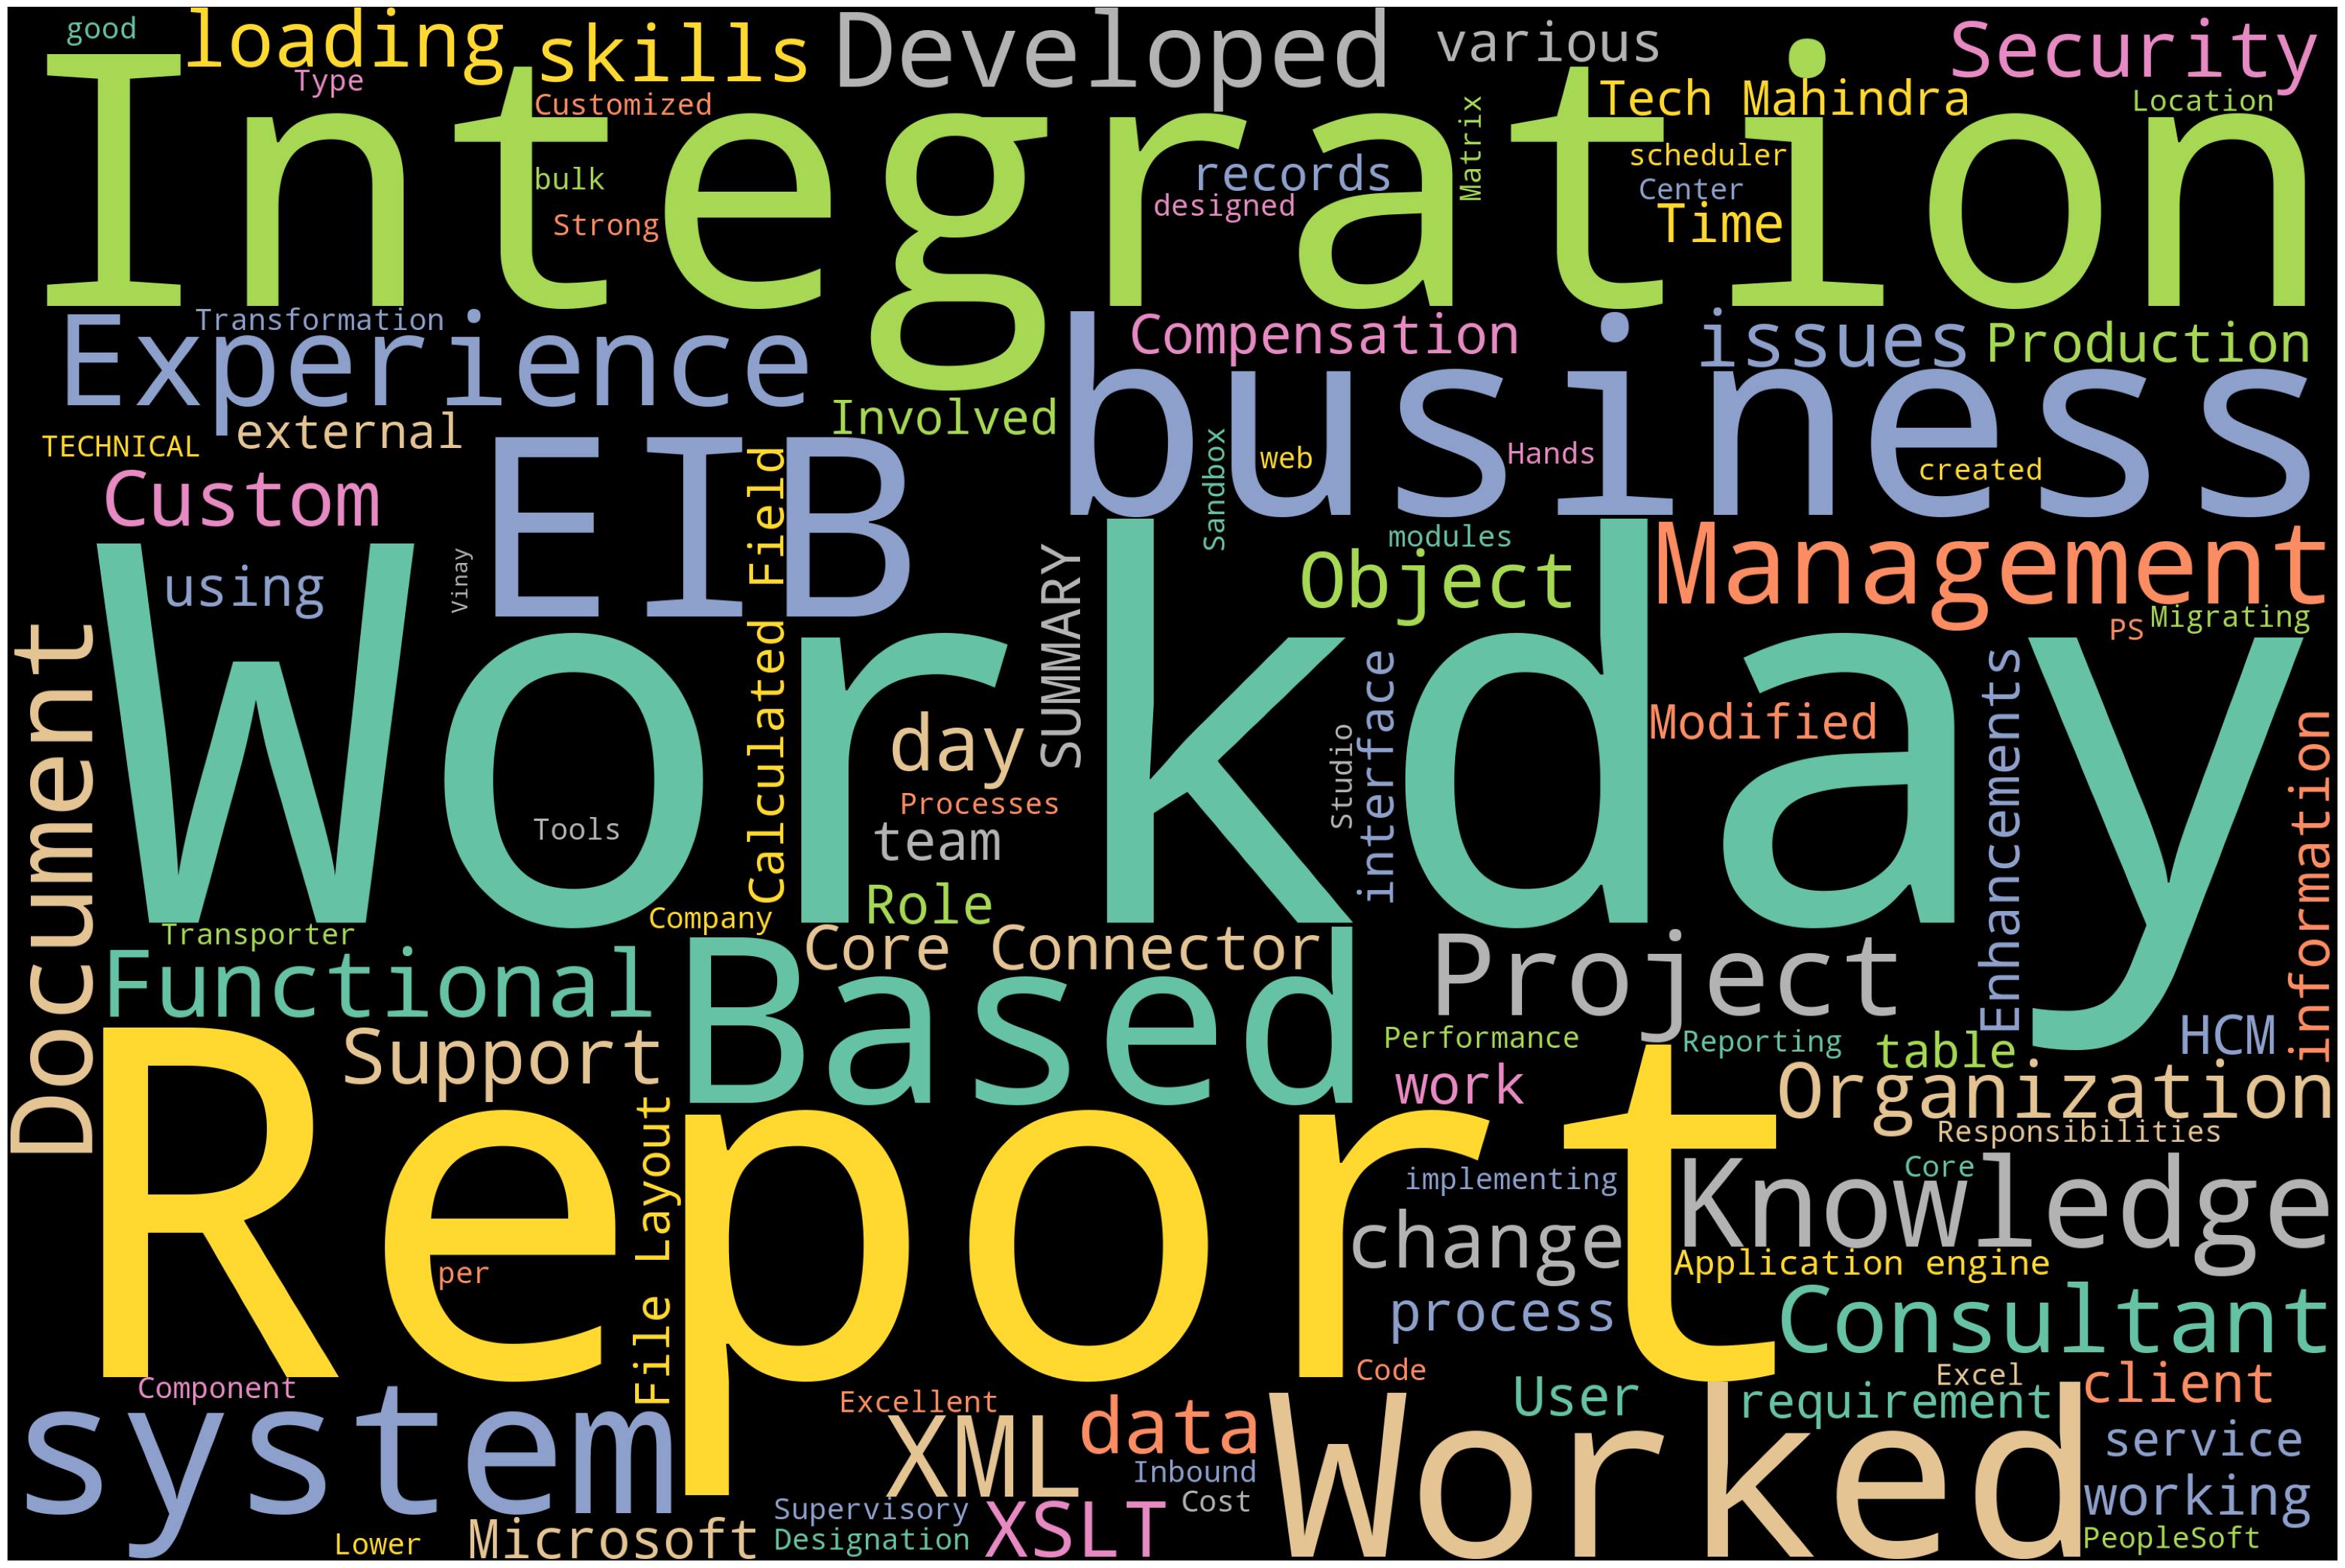

In [78]:
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(text)
# Plot
plot_cloud(wordcloud)

In [89]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

# Assuming resume_df is a DataFrame with a column named 'Details' containing text data
countvec = CountVectorizer(stop_words=stopwords.words('english'), ngram_range=(1, 2))
ngrams = countvec.fit_transform(Resume_df['Details'])  # matrix of ngrams
count_values = ngrams.toarray().sum(axis=0)  # count frequency of ngrams

vocab = countvec.vocabulary_ # list of ngrams
df_ngram = pd.DataFrame(sorted([(count_values[i],k) for k, i in vocab.items()],
                               reverse=True)).rename(columns={0: 'Frequency', 1:'Unigram_Bigram'})

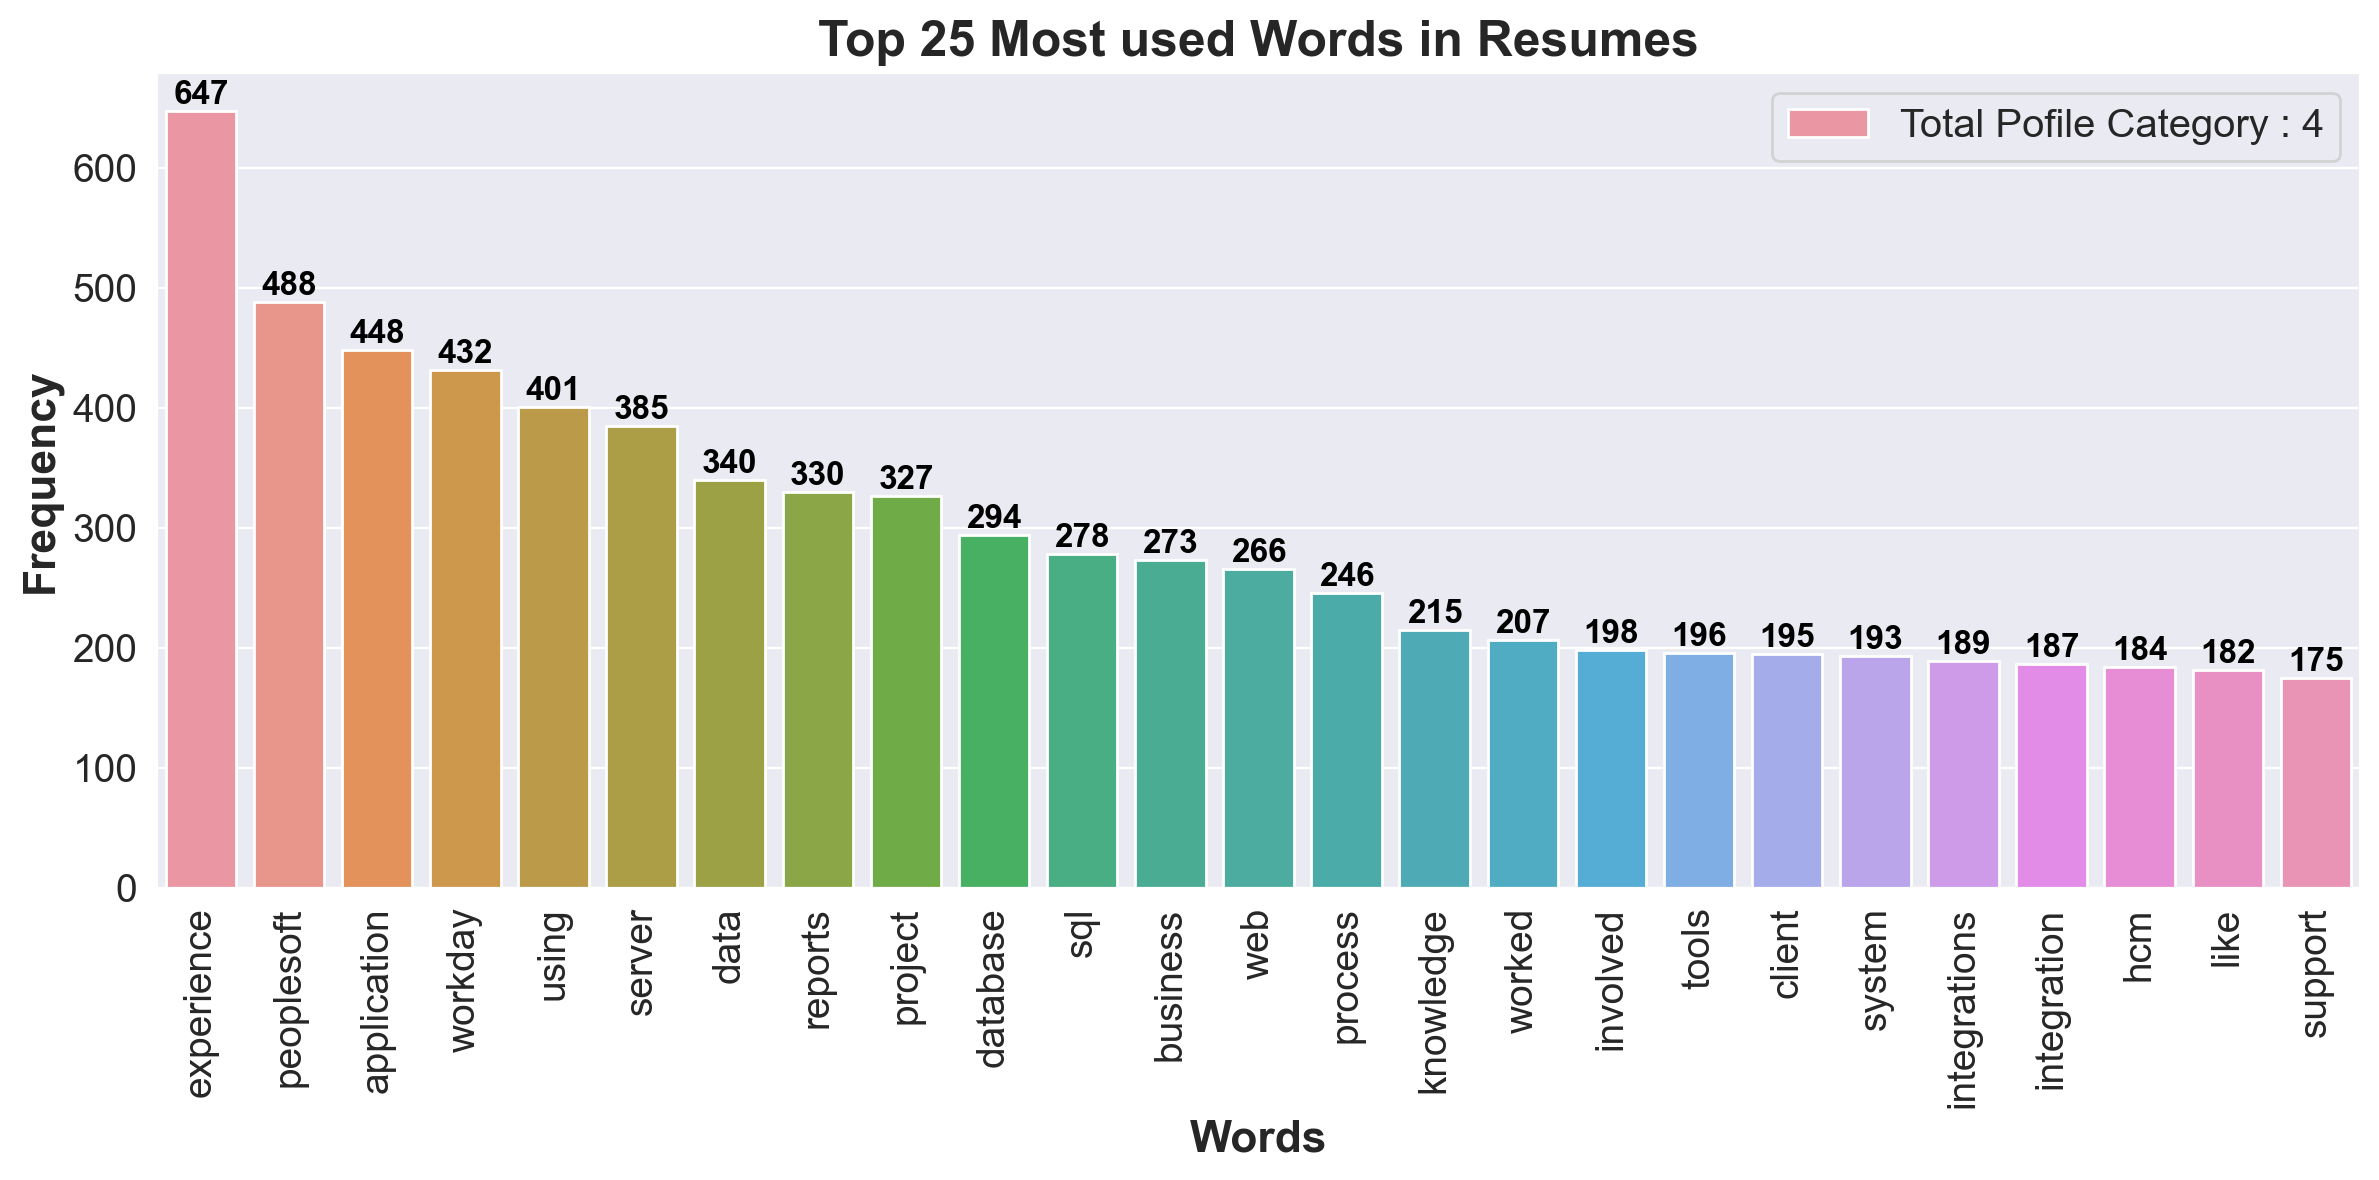

In [91]:
fig, axe = plt.subplots(1,1, figsize=(12,6), dpi=200)
ax = sns.barplot(x=df_ngram['Unigram_Bigram'].head(25), y=df_ngram.Frequency.head(25), data=resume_data, ax = axe,
            label='Total Pofile Category : {}'.format(len(Resume_df.Category.unique())))

axe.set_xlabel('Words', size=16,fontweight= 'bold')
axe.set_ylabel('Frequency', size=16, fontweight= 'bold')
plt.xticks(rotation = 90)
plt.legend(loc='best', fontsize= 'x-large')
plt.title('Top 25 Most used Words in Resumes', fontsize= 18, fontweight= 'bold')

for i in ax.containers:
    ax.bar_label(i,color = 'black', fontweight = 'bold', fontsize= 12)

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()


(-0.5, 999.5, 799.5, -0.5)

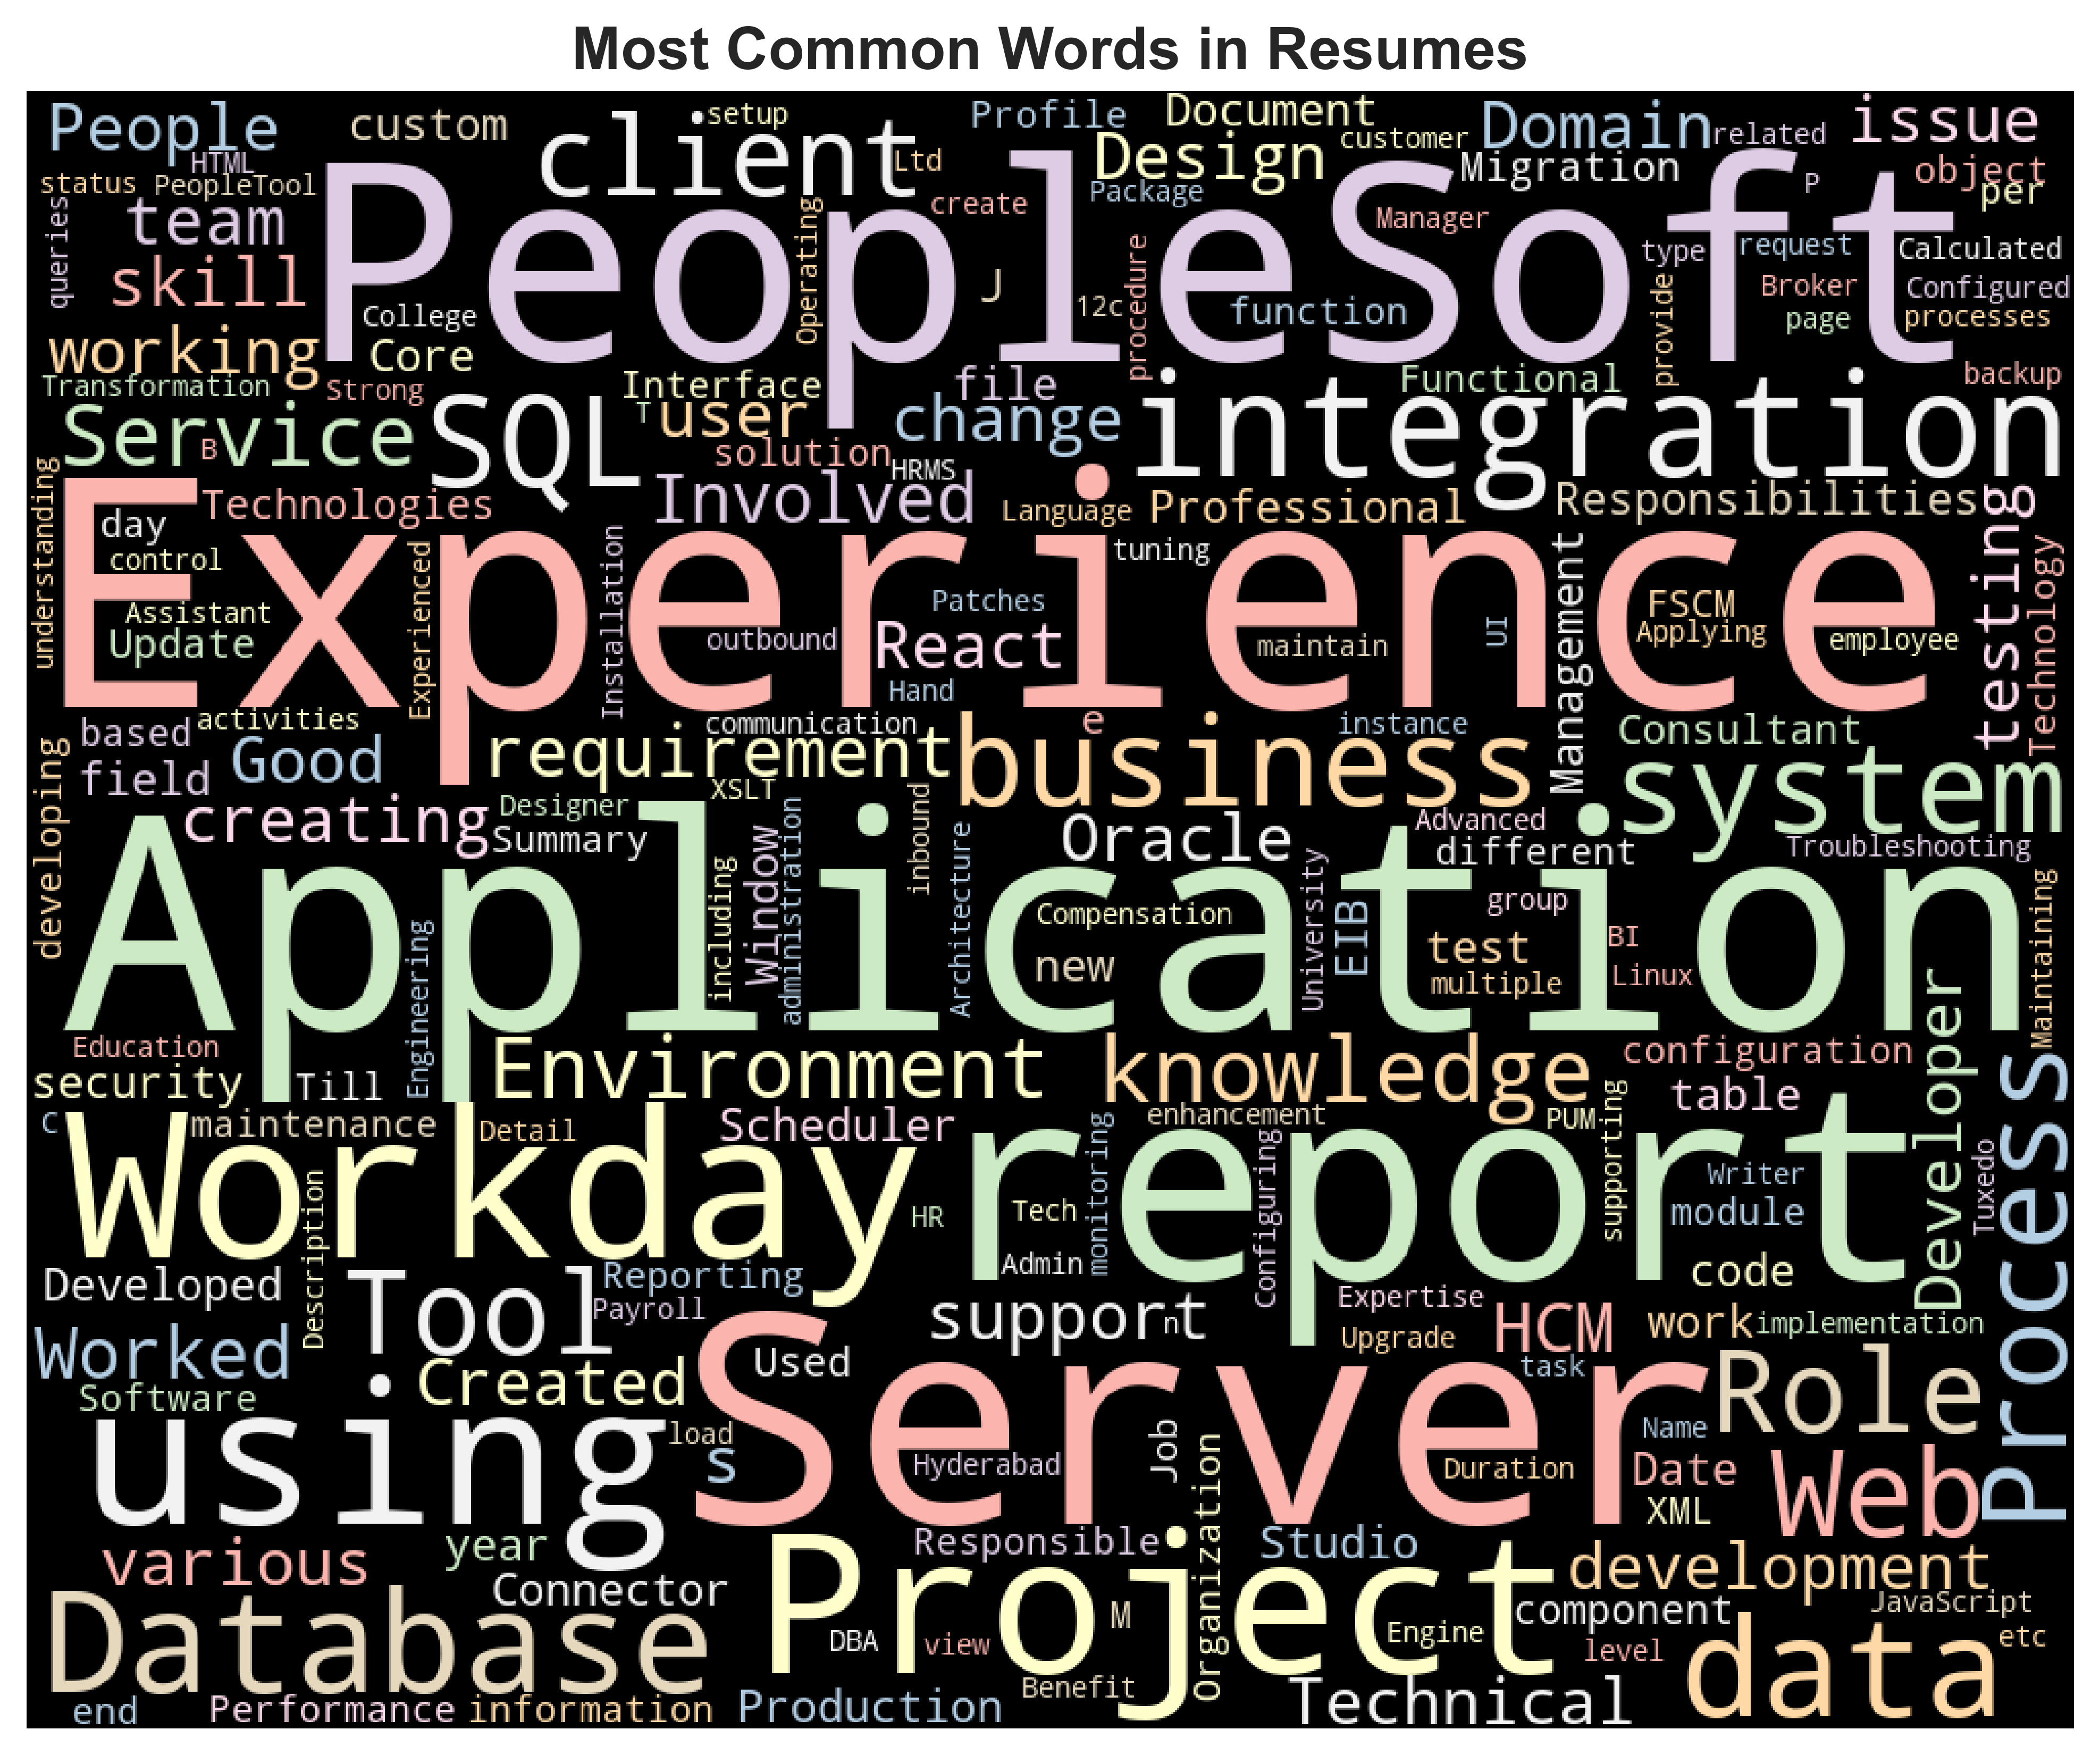

In [93]:
text = " ".join(cat for cat in Resume_df.Details) # Creating the text variable

word_cloud = WordCloud(width=1000, height=800, random_state=10, background_color="black", 
                       colormap="Pastel1", collocations=False, stopwords=STOPWORDS).generate(text)

plt.figure(figsize=(10,8), dpi=500) # Display the generated Word Cloud
plt.title('Most Common Words in Resumes', fontsize= 16, fontweight= 'bold')
plt.imshow(word_cloud)
plt.axis("off")